In [1]:
# Compare SV callers' output in Venn/UpSetR diagrams. Uses a VCF file obtained by SURVIVOR merge of the call sets.

In [2]:
library(venn)

In [3]:
library(UpSetR)

In [4]:
library(vcfR)


   *****       ***   vcfR   ***       *****
   This is vcfR 1.8.0 
     browseVignettes('vcfR') # Documentation
     citation('vcfR') # Citation
   *****       *****      *****       *****



In [5]:
sets<-c("Manta", "DELLY", "LUMPY", "GRIDSS")

In [6]:
nsets<-length(sets)

In [7]:
vcf<-read.vcfR('all.vcf', verbose = FALSE)

In [8]:
binvec<-sapply(strsplit(sapply(strsplit(getFIX(vcf, getINFO=TRUE)[, 'INFO'], ";"),
                       function(x) {x[2]}), '='), function (x) {x[2]})

In [9]:
#binvec

In [10]:
sets_sz<-data.frame(matrix(ncol=2, nrow=nsets))

In [11]:
names(sets_sz)<-c('caller', 'n')

In [12]:
for (i in 1:nsets) {
    s<-rep('.',nsets)
    s<-paste(replace(s,i,1), collapse='')
    re<-paste('^',s,'$', sep='')
    caller<-sets[i]
    n<-length(grep(s,binvec))
    sets_sz[i,]<-c(caller, n)
    #print(paste(caller, n))
}

In [13]:
#sets_sz

In [14]:
vec<-table(sapply(binvec, function(x) {strtoi(x, base=2)}))

In [15]:
#vec

In [16]:
lst<-strsplit(binvec, '')

In [17]:
#lst

In [18]:
s<-as.character(seq(0,(2**nsets-1)))

In [19]:
#s

In [20]:
N<-sapply(s, function(x){vec[x]}, USE.NAMES=FALSE)

In [21]:
N[is.na(N)]<-0

In [22]:
#N

In [23]:
slabels<-paste0(sets_sz$caller, ' (', sets_sz$n, ')')

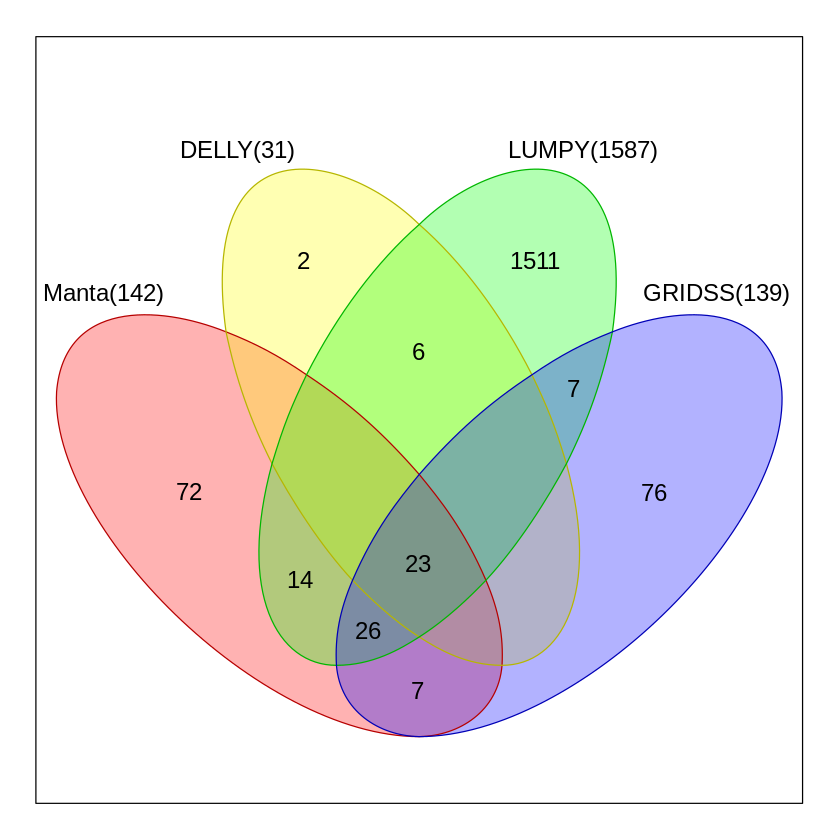

In [35]:
venn(nsets, counts=N, snames=slabels, ilabels=TRUE, cexil=1.2, cexsn=1.2, zcolor="style", ellipse=TRUE)

In [30]:
?venn

In [ ]:
nr<-length(lst)

In [ ]:
#nr

In [ ]:
nc<-length(lst[[1]])

In [ ]:
#nc

In [ ]:
M<-matrix(0, nrow=nr, ncol=nc)

In [ ]:
for (i in 1:nr)
{
  M[i, ] <- as.integer(lst[[i]])
}

In [ ]:
#M

In [ ]:
sv<-data.frame(ID = getFIX(vcf)[, 'ID'], M)

In [ ]:
#colnames(sv)

In [ ]:
colnames(sv)[-1]<-slabels

In [ ]:
#colnames(sv)

In [ ]:
upset(sv, nsets=nsets, sets.bar.color="#56B4E9", order.by="freq")